In [13]:
# data_path = "../results/all_performance_summary.csv"
# data_path = "../results-O2-rvv/all_performance_summary.csv"
rv_riscv64gc_data_path = "../results-O2-rv-riscv64gc/all_performance_summary.csv"
rv_riscv64gcv_data_path = "../results-O2-rvv-riscv64gcv-old/all_performance_summary.csv"
# RVV before 2025.04.04
rvv_riscv64gcv_old_data_path = "../results-O2-rvv-riscv64gcv-old/all_performance_summary.csv"
# RVV after 2025.04.04
rvv_riscv64gcv_data_path = "../results-O2-rvv-riscv64gcv-0404/all_performance_summary.csv"

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV data
# df = pd.read_csv(data_path)
# df_rv = pd.read_csv(rv_data_path)
df_rv_riscv64gc = pd.read_csv(rv_riscv64gc_data_path)
df_rv_riscv64gcv = pd.read_csv(rv_riscv64gcv_data_path)
df_rvv_riscv64gcv_old = pd.read_csv(rvv_riscv64gcv_old_data_path)
df_rvv_riscv64gcv = pd.read_csv(rvv_riscv64gcv_data_path)


In [14]:
from gem5_metrics import metrics

print("metrics: ", metrics.values())

df_labels = df_rvv_riscv64gcv.columns
print("df_labels: ", df_labels)

vlen_list = df_rvv_riscv64gcv['vlen'].unique()
vlen_list.sort()
print("vlen_list: ", vlen_list)

top_k_list = df_rvv_riscv64gcv['top_k'].unique()
top_k_list.sort()
print("top_k_list: ", top_k_list)


metrics:  dict_values(['SimSecond', 'SimTick', 'SimIns', 'SimOp', 'HstInsRate', 'HstOpRate', 'CPU_CPI', 'CPU_IPC', 'L1i_TotHits', 'L1i_TotMisses', 'L1i_TotMissRate', 'L1i_TotAvgMissLat', 'L1d_TotHits', 'L1d_TotMisses', 'L1d_TotMissRate', 'L1d_TotAvgMissLat', 'L1d_ReadReqHits', 'L1d_ReadReqMisses', 'L1d_ReadReqMissRate', 'L1d_ReadReqAvgMissLat', 'L1d_WriteReqHits', 'L1d_WriteReqMisses', 'L1d_WriteReqMissRate', 'L1d_WriteReqAvgMissLat', 'L2_TotHits', 'L2_TotMisses', 'L2_TotMissRate', 'L2_TotAvgMissLat'])
df_labels:  Index(['vlen', 'elen', 'workload_type', 'dataset_type', 'distance_type',
       'dimension', 'num_points', 'num_queries', 'top_k', 'SimSecond',
       'SimTick', 'SimIns', 'SimOp', 'HstInsRate', 'HstOpRate', 'CPU_CPI',
       'CPU_IPC', 'L1i_TotHits', 'L1i_TotMisses', 'L1i_TotMissRate',
       'L1i_TotAvgMissLat', 'L1d_TotHits', 'L1d_TotMisses', 'L1d_TotMissRate',
       'L1d_TotAvgMissLat', 'L1d_ReadReqHits', 'L1d_ReadReqMisses',
       'L1d_ReadReqMissRate', 'L1d_ReadReqAvg

SimSecond


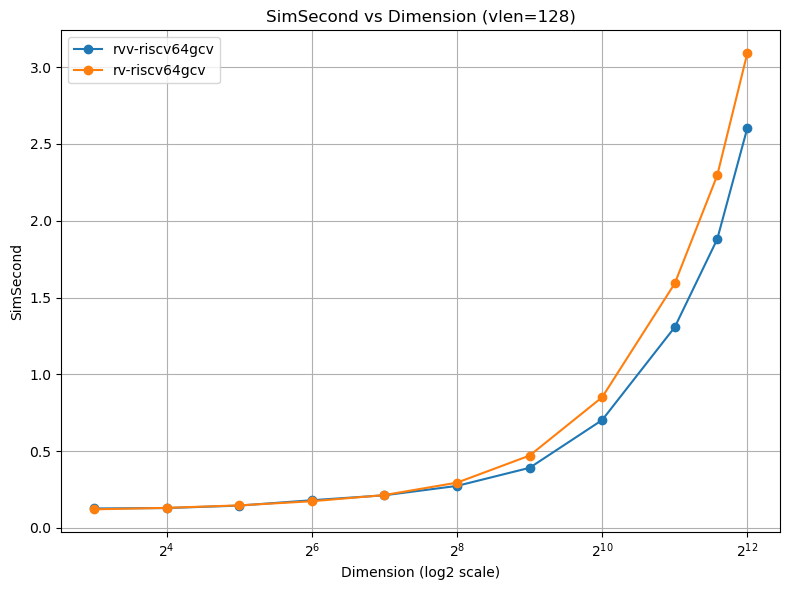

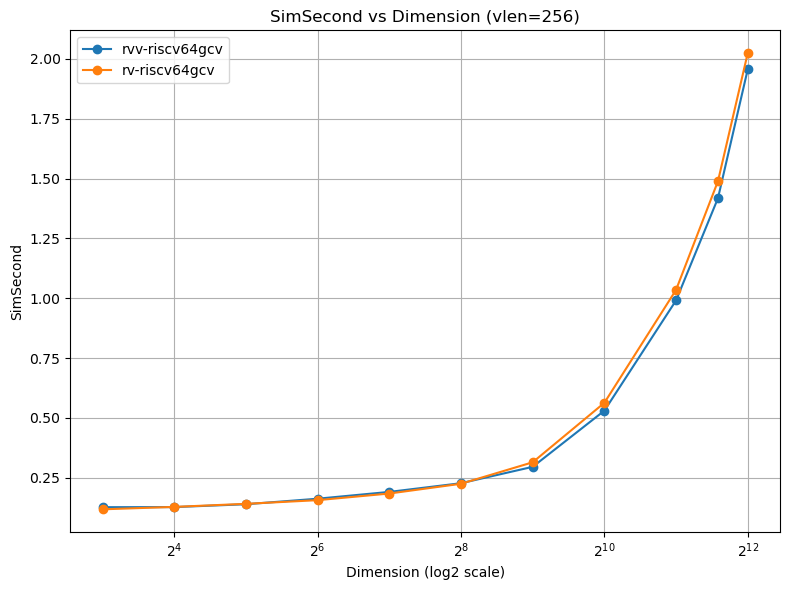

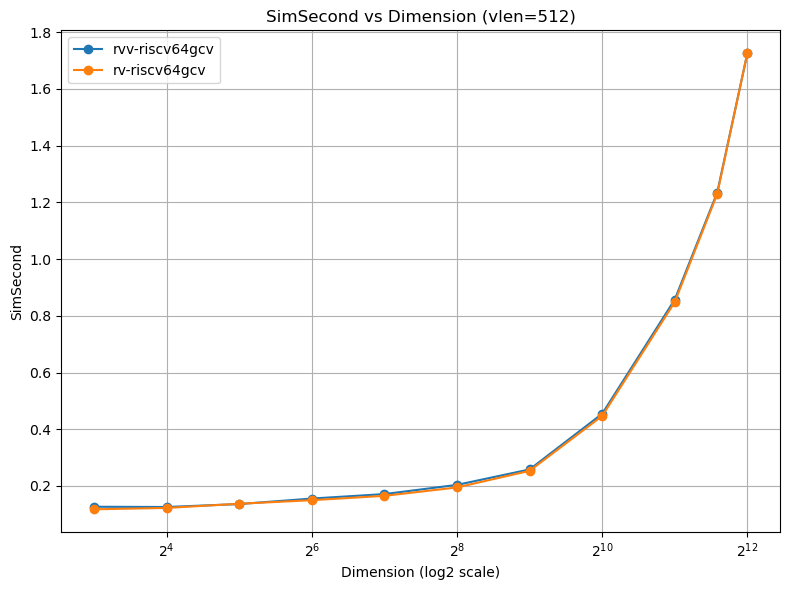

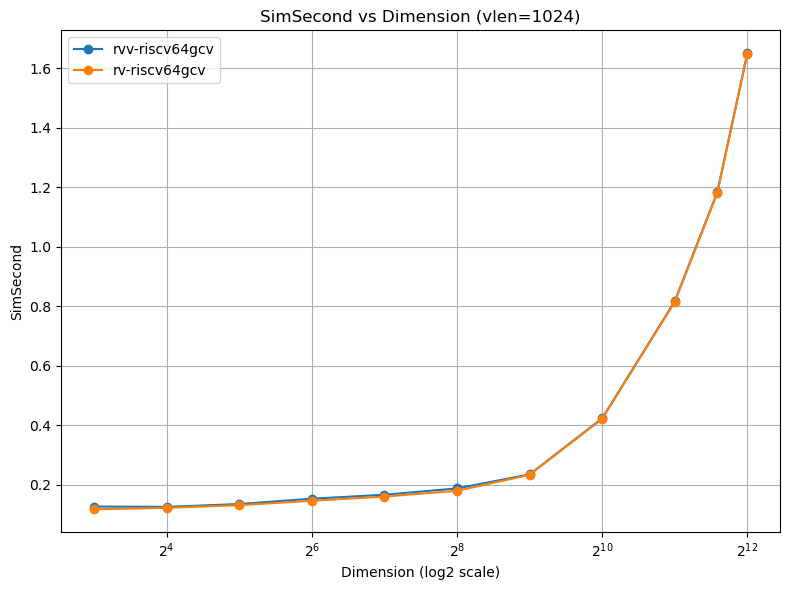

CPU_IPC


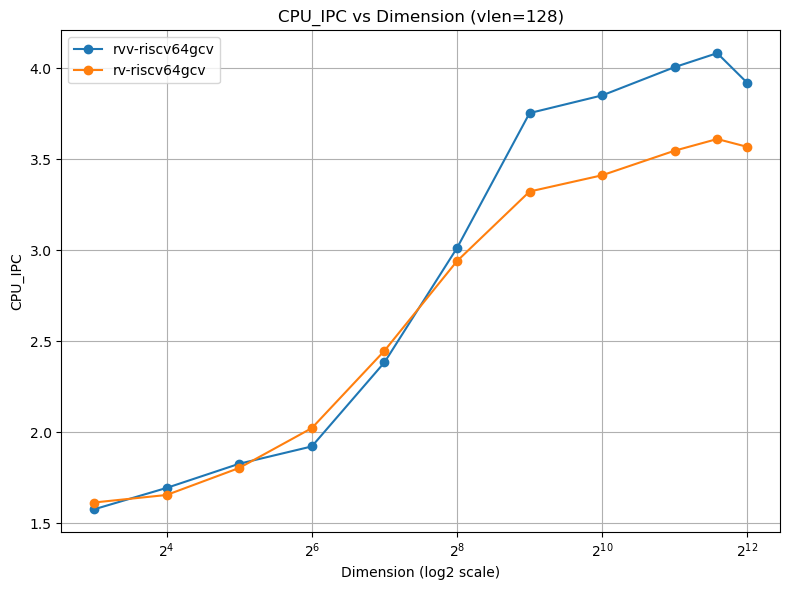

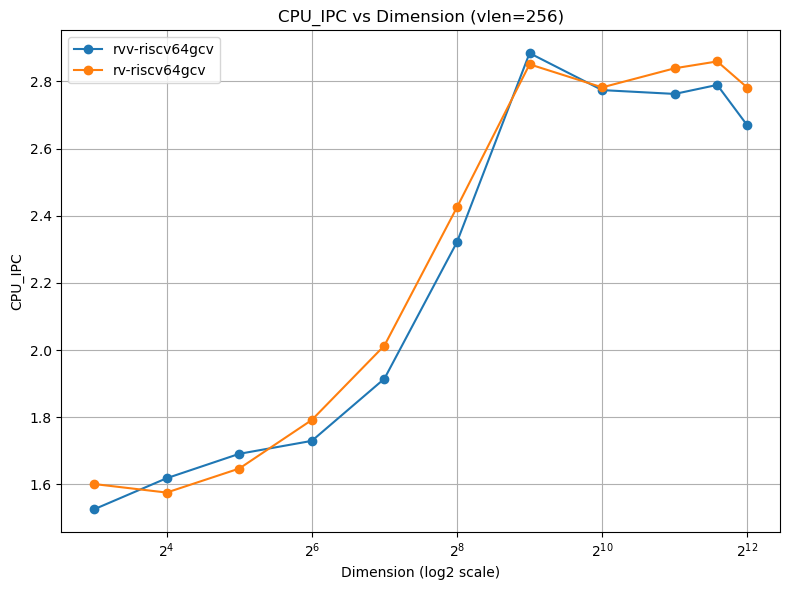

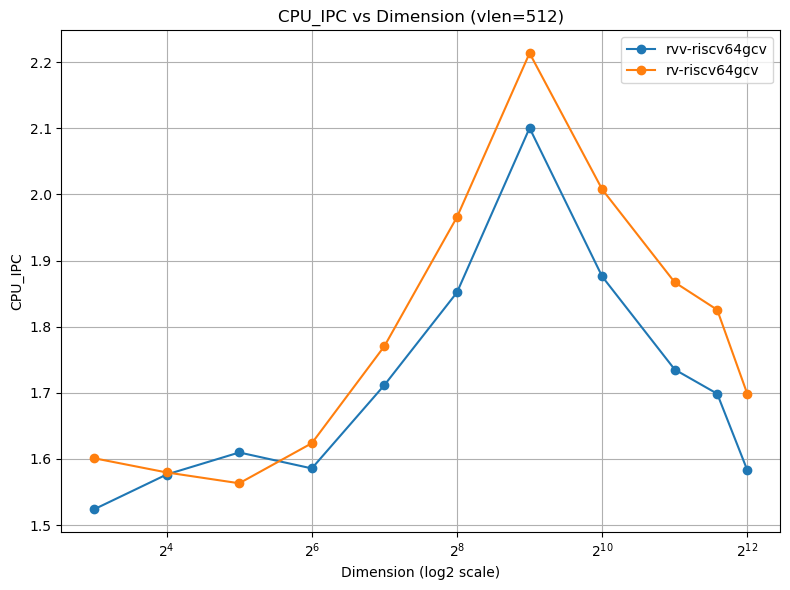

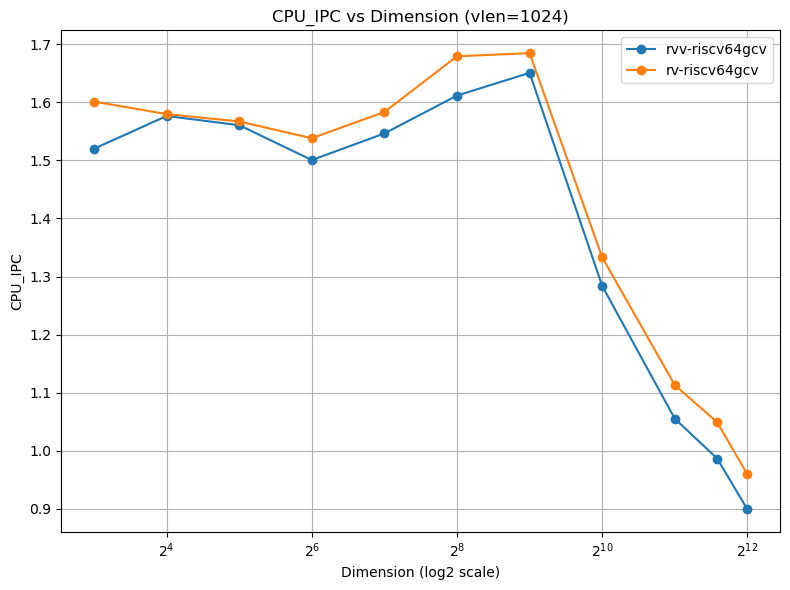

L1d_TotMissRate


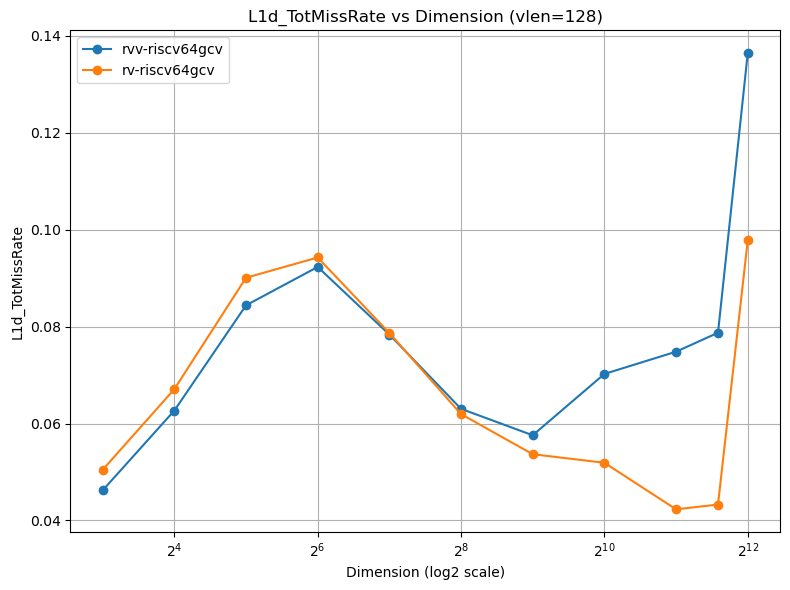

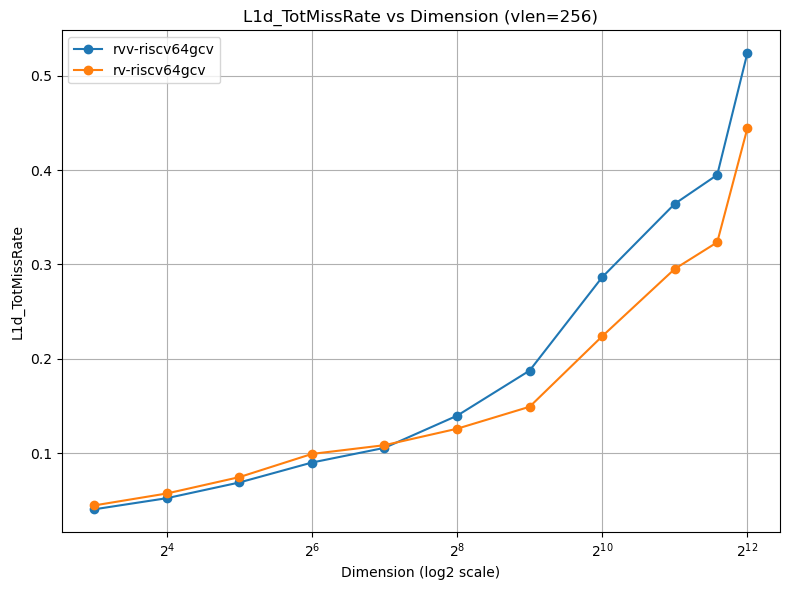

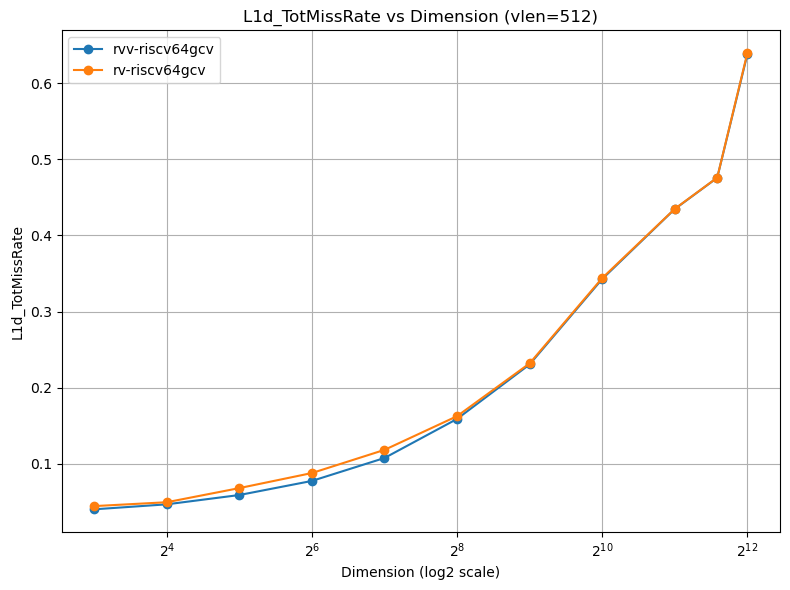

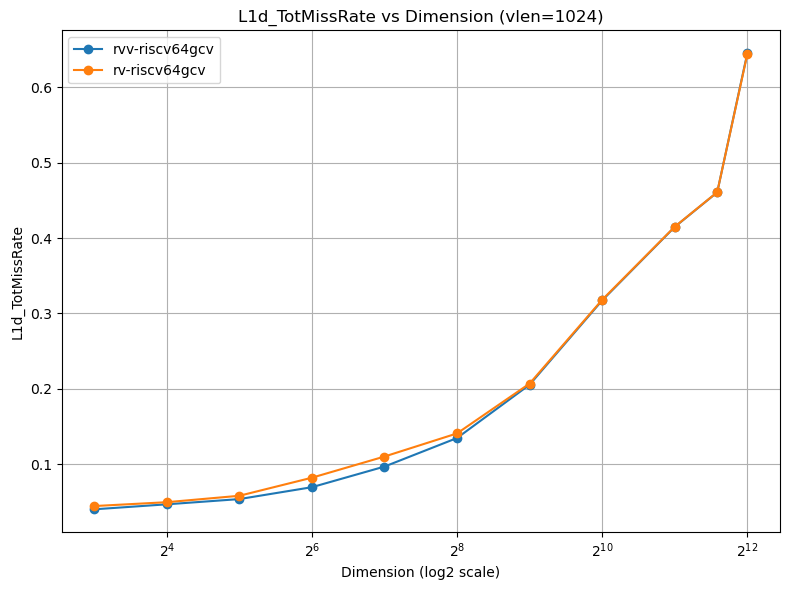

L1d_TotAvgMissLat


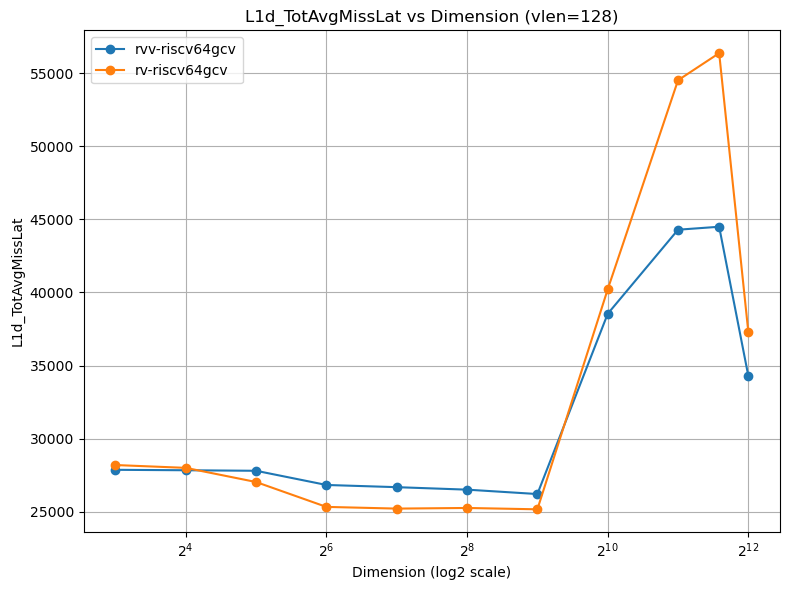

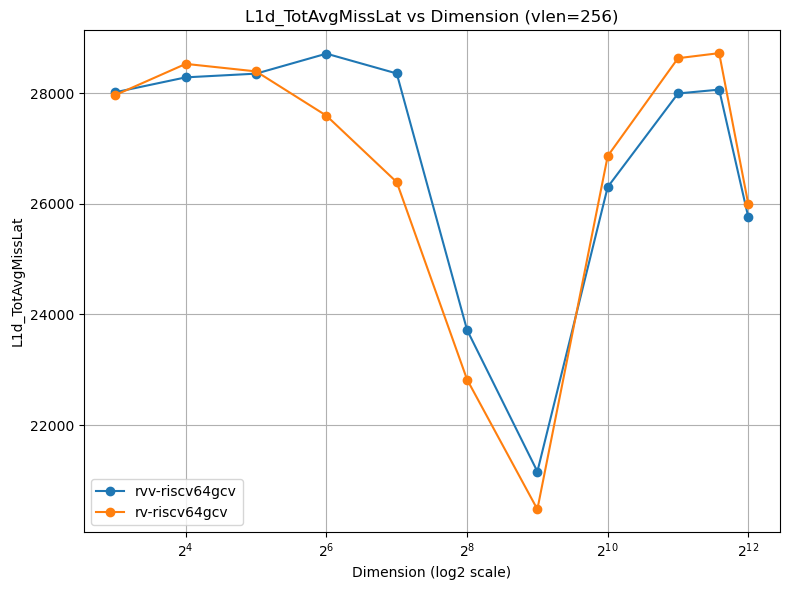

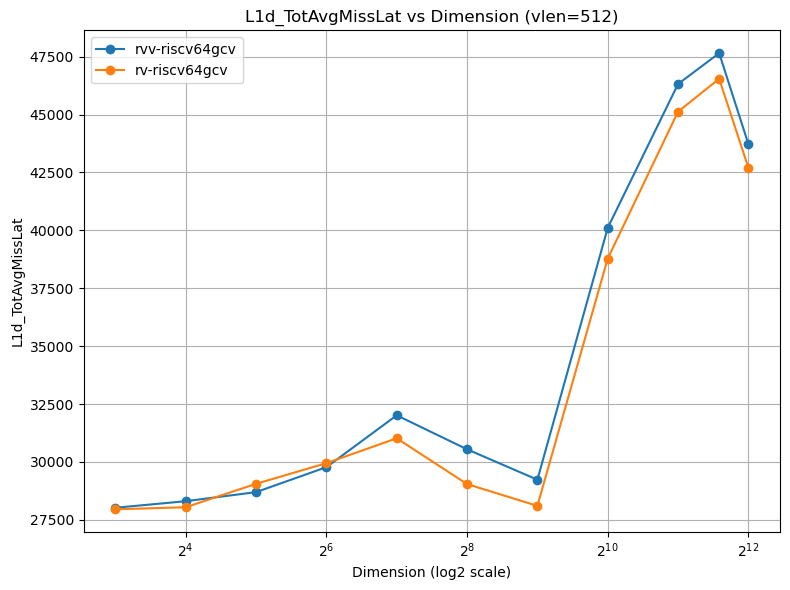

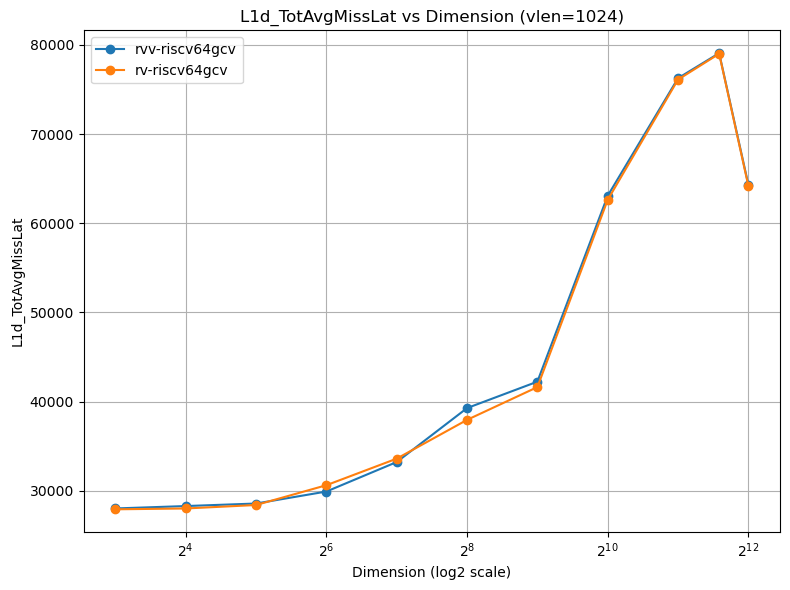

L2_TotMissRate


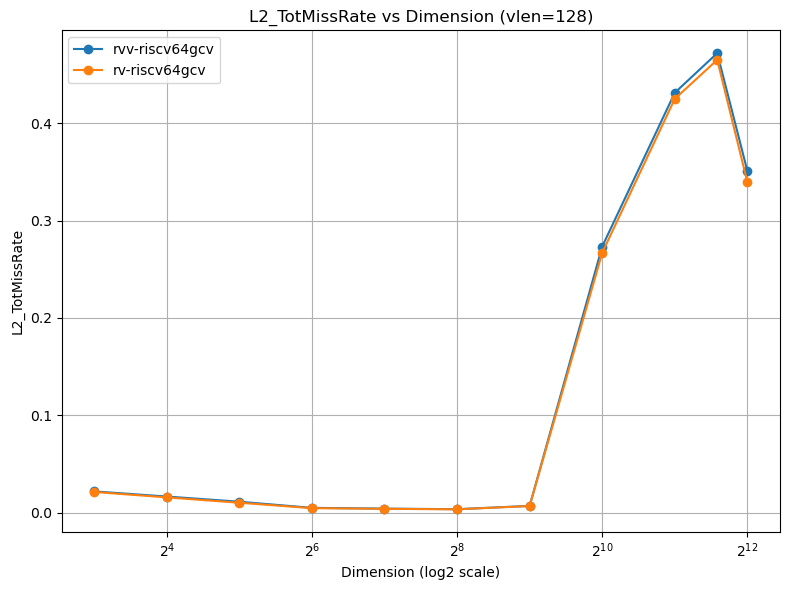

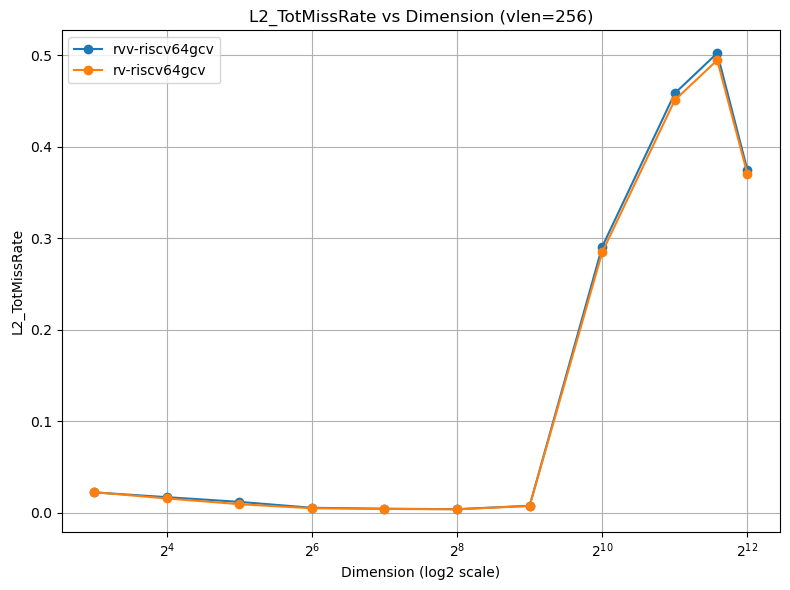

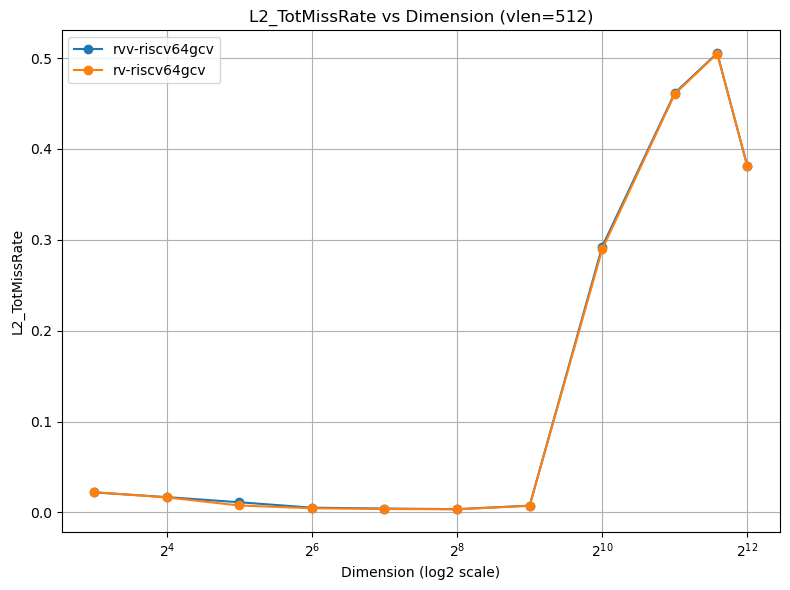

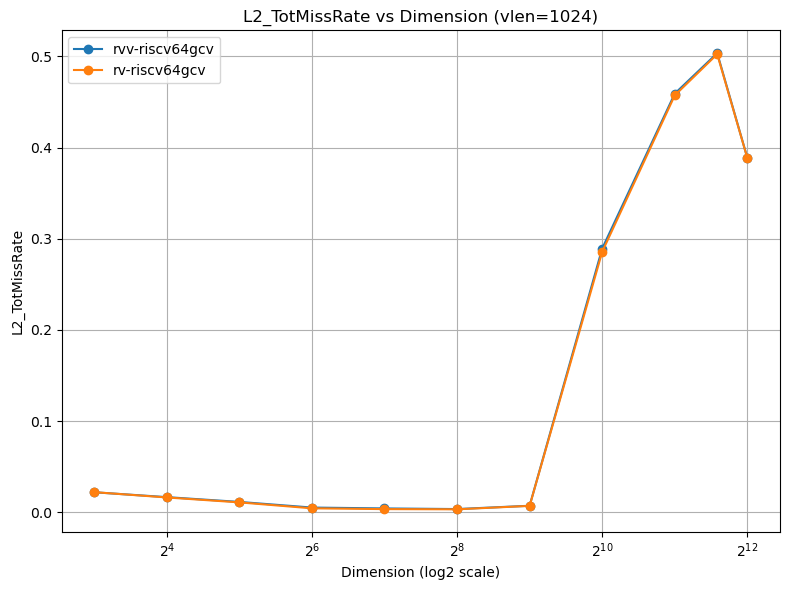

L2_TotAvgMissLat


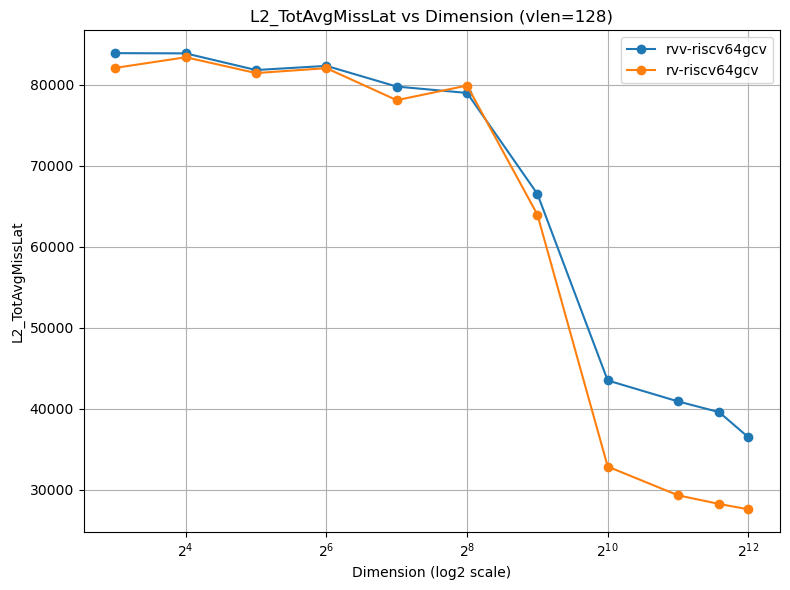

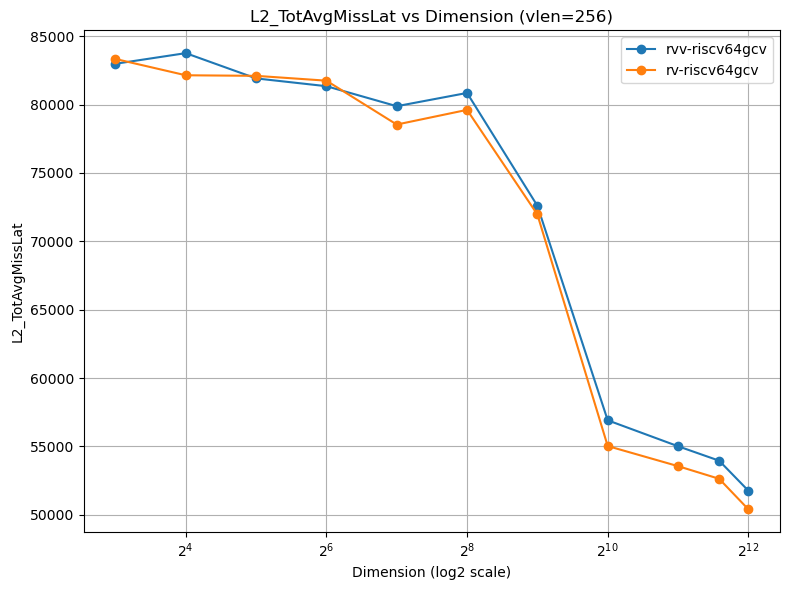

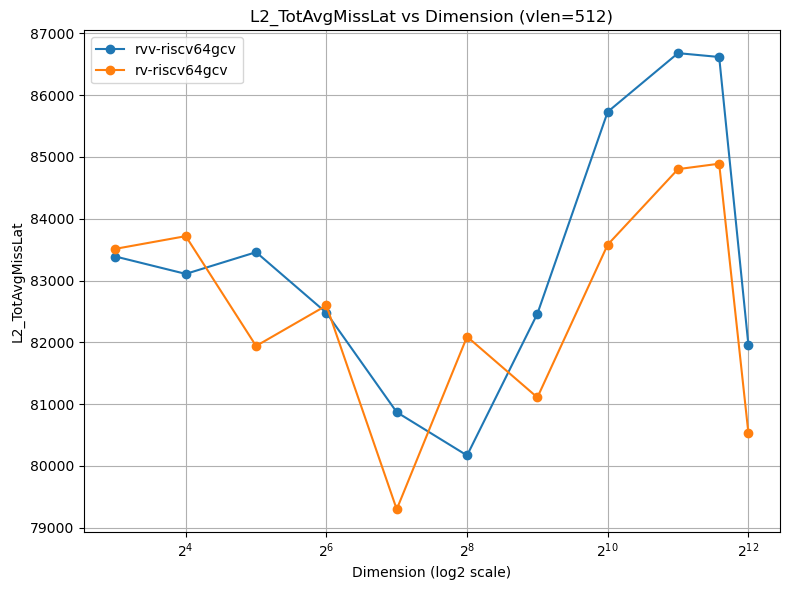

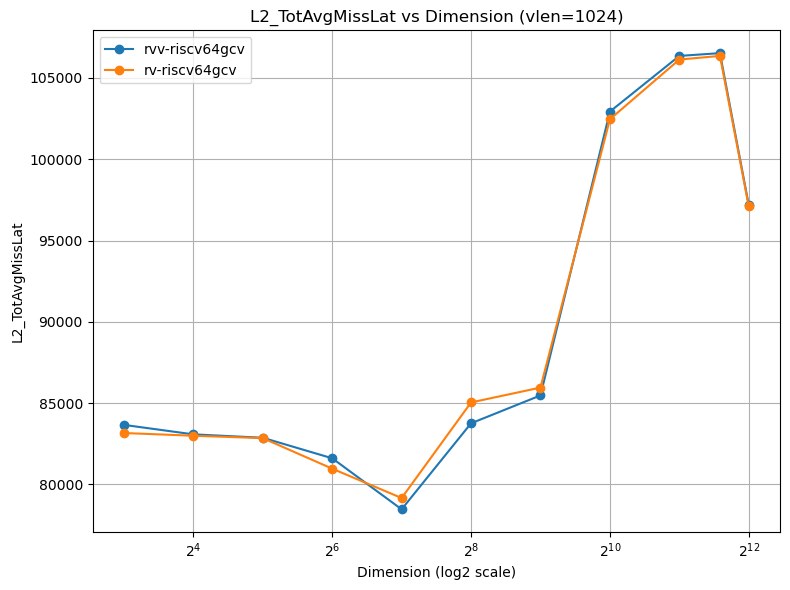

In [20]:
for metric_label in ['SimSecond', 'CPU_IPC', 'L1d_TotMissRate', 'L1d_TotAvgMissLat', 'L2_TotMissRate', 'L2_TotAvgMissLat']:
    print(metric_label)
    if metric_label in df_labels:
        for vlen in vlen_list:
        # for vlen in [128, 512]:
            plt.figure(figsize=(8, 6))

            # RVV + riscv64gcv
            rvv_riscv64gcv_mask = (df_rvv_riscv64gcv['vlen'] == vlen) & (df_rvv_riscv64gcv['top_k'] == 100) & (df_rvv_riscv64gcv['workload_type'] == 'rvv')
            rvv_riscv64gcv_data = df_rvv_riscv64gcv[rvv_riscv64gcv_mask].sort_values('dimension')
            plt.semilogx(rvv_riscv64gcv_data['dimension'], rvv_riscv64gcv_data[metric_label], marker='o', label='rvv-riscv64gcv', base=2)

            # # RVV + riscv64gcv_old
            # rvv_riscv64gcv_old_mask = (df_rvv_riscv64gcv_old['vlen'] == vlen) & (df_rvv_riscv64gcv_old['top_k'] == 100) & (df_rvv_riscv64gcv_old['workload_type'] == 'rvv')
            # rvv_riscv64gcv_old_data = df_rvv_riscv64gcv_old[rvv_riscv64gcv_old_mask].sort_values('dimension')
            # plt.semilogx(rvv_riscv64gcv_old_data['dimension'], rvv_riscv64gcv_old_data[metric_label], marker='o', label='rvv-riscv64gcv-old', base=2)

            # RV + riscv64gcv
            rv_riscv64gcv_mask = (df_rv_riscv64gcv['vlen'] == vlen) & (df_rv_riscv64gcv['top_k'] == 100) & (df_rv_riscv64gcv['workload_type'] == 'rv')
            rv_riscv64gcv_data = df_rv_riscv64gcv[rv_riscv64gcv_mask].sort_values('dimension')
            plt.semilogx(rv_riscv64gcv_data['dimension'], rv_riscv64gcv_data[metric_label], marker='o', label='rv-riscv64gcv', base=2)

            # # RV + riscv64gc
            # rv_riscv64gc_mask = (df_rv_riscv64gc['vlen'] == vlen) & (df_rv_riscv64gc['top_k'] == 100) & (df_rv_riscv64gc['workload_type'] == 'rv')
            # rv_riscv64gc_data = df_rv_riscv64gc[rv_riscv64gc_mask].sort_values('dimension')
            # plt.semilogx(rv_riscv64gc_data['dimension'], rv_riscv64gc_data[metric_label], marker='o', label='rv-riscv64gc', base=2)


            # # Sort data by dimension and plot rvv and rv lines
            # # for workload_type in ['rvv']:
            # for workload_type in ['rvv', 'rv']:
            #     type_mask = data['workload_type'] == workload_type
            #     plot_data = data[type_mask].sort_values('dimension')
            #     plt.semilogx(plot_data['dimension'], plot_data[metric_label], 
            #              marker='o', label=workload_type.upper(), base=2)
            
            # mask_rv = df_rv['vlen'] == 1024
            # data_rv = df_rv[mask_rv]
            # plot_data_rv = data_rv.sort_values('dimension')
            # plt.semilogx(plot_data_rv['dimension'], plot_data_rv[metric_label], 
            #              marker='o', label='rv', base=2)
            
            # Customize the plot
            plt.xlabel('Dimension (log2 scale)')
            plt.ylabel(metric_label)
            plt.title(f'{metric_label} vs Dimension (vlen={vlen})')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        
        # # Plot for different vector lengths (separate plot for each dimension)
        # for dim in df['dimension'].unique():
        #     plt.figure(figsize=(8, 6))
            
        #     # Filter data for current dimension
        #     mask = (df['dimension'] == dim) & (df['top_k'] == 50)
        #     data = df[mask]
            
        #     # Sort data by vlen and plot rvv and rv lines
        #     for workload_type in ['rvv', 'rv']:
        #         type_mask = data['workload_type'] == workload_type
        #         plot_data = data[type_mask].sort_values('vlen')
        #         plt.semilogx(plot_data['vlen'], plot_data[metric_label], 
        #                  marker='o', label=workload_type.upper(), base=2)
            
        #     # Customize the plot
        #     plt.xlabel('Vector Length (log2 scale)')
        #     plt.ylabel(metric_label)
        #     plt.title(f'{metric_label} vs Vector Length (dim={dim})')
        #     plt.legend()
        #     plt.grid(True)
        #     plt.tight_layout()
        #     plt.show()
